<a href="https://colab.research.google.com/github/minsuzzz/bootcamp_project/blob/main/%EC%84%B8%EC%85%981_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Day 1-3] 프로젝트

### 다음 분기에 어떤 게임을 설계해야 할까

> Name : 게임의 이름입니다.
>
> Platform : 게임이 지원되는 플랫폼의 이름입니다.
>
> Year : 게임이 출시된 연도입니다.
>
> Genre : 게임의 장르입니다.
>
> Publisher : 게임을 제작한 회사입니다.
>
> NA_Sales : 북미지역에서의 출고량입니다.
>
> EU_Sales : 유럽지역에서의 출고량입니다.
>
> JP_Sales : 일본지역에서의 출고량입니다.
>
> Other_Sales : 기타지역에서의 출고량입니다.
>



### 반드시 들어가야하는 내용

* 지역에 따라서 선호하는 게임 장르가 다를까?

* 연도별 게임의 트렌드가 있을까?

* 출고량이 높은 게임에 대한 분석 및 시각화 프로세스


In [1]:
from google.colab import files
file_uploaded = files.upload()

Saving vgames2.csv to vgames2 (4).csv


In [17]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(file_uploaded['vgames2.csv']))

### 데이터 전처리

In [18]:
df.dropna(how='any', inplace=True)

In [19]:
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [20]:
# 'Year' 컬럼을 보니 단위가 다르다.
a = df.sort_values(by='Year', ascending=True)
print(a['Year'].head(10))
print(a['Year'].tail(10))

df.reset_index(drop=True, inplace=True)
df.index

9276    0.00
16394   0.00
14666   0.00
2249    1.00
8681    1.00
11163   2.00
15612   2.00
8144    2.00
8912    3.00
8509    3.00
Name: Year, dtype: float64
3941    2016.00
3936    2016.00
10287   2016.00
2367    2016.00
10305   2016.00
1786    2016.00
10107   2017.00
5310    2017.00
15233   2017.00
6906    2020.00
Name: Year, dtype: float64


RangeIndex(start=0, stop=16241, step=1)

In [21]:
for i in df['Year'].index:    
  if df.Year.iloc[i] < 30:
    df.Year.iloc[i] = df.Year.iloc[i] + 2000
  elif (30 <= df.Year.iloc[i]) & (df.Year.iloc[i] <= 99):
    df.Year.iloc[i] = df.Year.iloc[i] + 1900

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [22]:
b = df.sort_values(by='Year', ascending=True)
print(b['Year'].head(10))
print(b['Year'].tail(10))

df['Year'] = df['Year'].astype(int)
df.head()

13958   1980.00
5604    1980.00
14691   1980.00
9045    1980.00
12859   1980.00
9924    1980.00
7171    1980.00
5817    1980.00
1045    1981.00
1289    1981.00
Name: Year, dtype: float64
1465    2016.00
12383   2016.00
7439    2016.00
12368   2016.00
9475    2016.00
6986    2016.00
9911    2017.00
5196    2017.00
14903   2017.00
6765    2020.00
Name: Year, dtype: float64


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [23]:
# Sales 값 통일하기
## test
print(df.columns)

def sales(i):
  try:
    float(i)
  except:
    if 'M' in i:
      i = float(i[:-1])
    elif 'K' in i:
      i = float(i[:-1]) / 1000
  return i

df['NA_Sales'] = df['NA_Sales'].apply(sales).astype(float)
df['EU_Sales'] = df['EU_Sales'].apply(sales).astype(float)
df['JP_Sales'] = df['JP_Sales'].apply(sales).astype(float)
df['Other_Sales'] = df['Other_Sales'].apply(sales).astype(float)

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')


In [24]:
c = df.sort_values(by='NA_Sales', ascending=True)
c
df.loc[df['Name'] == 'Call of Duty: Ghosts', ['NA_Sales']]

,NA_Sales
854,0.23
5489,6.72
5557,0.23
6740,4.09
9602,1.78
12706,1.87


In [25]:
df['total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['total_Sales']

pd.options.display.float_format = '{:.2f}'.format

d = df.sort_values(by='total_Sales', ascending=True)
d

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales
5483,5599,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.00
12775,13050,Fatal Fury: Battle Archives Volume 2 (JP sales),PS2,2007,Fighting,SNK Playmore,0.00,0.00,0.01,0.00,0.01
8025,8187,Junjou Romanchika: Koi no Doki Doki Daisakusen,PS2,2008,Adventure,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
14360,14675,Blitzkrieg 2 Anthology,PC,2008,Strategy,Ascaron Entertainment GmbH,0.00,0.01,0.00,0.00,0.01
5982,6107,Jam Sessions: Sing and Play Guitar (jp sales),DS,2007,Misc,Ubisoft,0.00,0.00,0.01,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...
7673,7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
3288,3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
12316,12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
4113,4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [26]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [33]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

      NA_Sales  EU_Sales  JP_Sales  Other_Sales
Year                                           
1980     10.13      0.64      0.00         0.11
1981     33.40      1.96      0.00         0.32
1982     26.92      1.65      0.00         0.31
1983      7.76      0.80      8.10         0.14
1984     33.28      2.10     14.27         0.70
1985     33.73      4.74     14.56         0.92
1986     12.50      2.84     19.81         1.93
1987      8.46      1.41     11.63         0.20
1988     23.87      6.59     15.76         0.99
1989     45.15      8.44     18.36         1.50
1990     25.46      7.63     14.88         1.40
1991     12.76      3.95     14.78         0.74
1992     33.87     11.71     28.91         1.65
1993     15.12      4.65     25.33         0.89
1994     28.15     14.88     33.99         2.20
1995     24.82     14.90     45.75         2.64
1996     86.53     47.10     57.44         7.66
1997     94.75     48.32     48.87         9.13
1998    127.86     66.56     49.75      

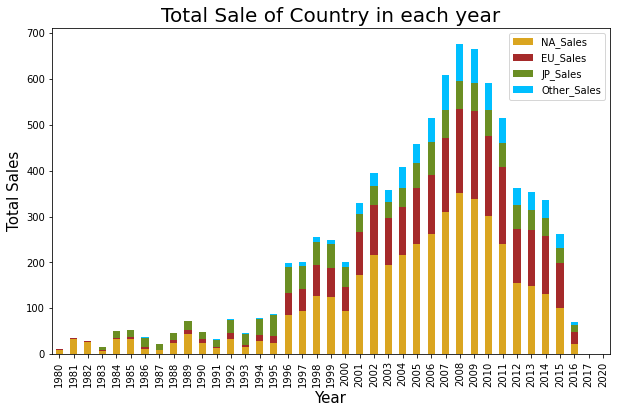

In [28]:
# Group by를 활용한 시각화 분석
import matplotlib.pyplot as plt

# 지역별 연도별 매출 

year_zone = df.groupby('Year').sum()
year_zone = year_zone.iloc[:,1:-1]
year_zone

print(year_zone)

# 그래프만들기
year_zone.plot.bar(stacked=True, figsize=(10,6), color=['goldenrod', 'brown', 'olivedrab', 'deepskyblue'])
plt.title("Total Sale of Country in each year", fontsize=20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total Sales', fontsize=15)
plt.show();

In [44]:
# 1980~1995년도 데이터는 값이 적고 2016년도 데이터는 종결되지 않은 데이터라고 판단되어 데이터 삭제

year_95 = df[df['Year'] < 1996].index
year_16 = df[df['Year'] >= 2016].index

df.drop(year_95.values, inplace=True)
df.drop(year_16.values, inplace=True)

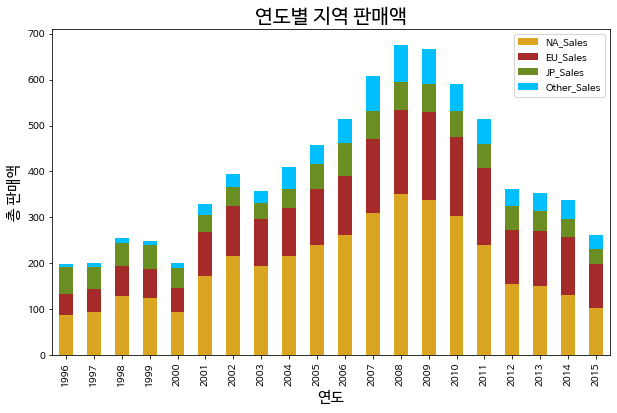

In [85]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# 지역별 연도별 매출 
year_zone2 = df.groupby('Year').sum()
year_zone2 = year_zone2.iloc[:,1:-1]
year_zone2


# 그래프만들기

ax = year_zone2.plot.bar(stacked=True, figsize=(10,6), color=['goldenrod', 'brown', 'olivedrab', 'deepskyblue'])
plt.title("연도별 지역 판매액", fontsize=20)
plt.xlabel('연도', fontsize = 15)
plt.ylabel('총 판매액', fontsize=15)
# plt.grid(True, axis='y')

# 범례설정
# variable_x = mpatches.Patch(color='goldenrod',label='북미')
# variable_y = mpatches.Patch(color='brown',label='유럽')
# variable_z = mpatches.Patch(color='olivedrab',label='일본')
# variable_a = mpatches.Patch(color='deepskyblue',label='그 외')

#범례 나타내기
# plt.legend(handles=[variable_x, variable_y, variable_z, variable_a], loc=(0.03, 0.76)) #, ncol=4(범례를 행으로)
#	upper right / upper left / lower left / lower right / right / center left / center right/ lower center/ upper center / center
plt.show();

#### 지역별 분석
* 전체 총 판매액이 북미시장에서 제일 많으나 2008년 이후 점차 매출이 하락하고 있음

* 유럽 시장은 **북미** 시장 다음으로 매출이 많은 지역이며 연도별 매출액이 균등하게 유지되므로 

* **유럽** 시장을 타겟으로 하겠음

              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          802.09    499.19    135.87       180.95
Sports          644.46    358.38     99.49       129.55
Shooter         509.10    295.76     26.10        98.05
Racing          338.06    228.15     42.46        75.04
Misc            385.06    204.78     93.43        72.27
Role-Playing    314.17    181.34    287.95        54.38
Platform        312.37    167.18     70.40        45.55


Text(0, 0.5, '총 판매액')

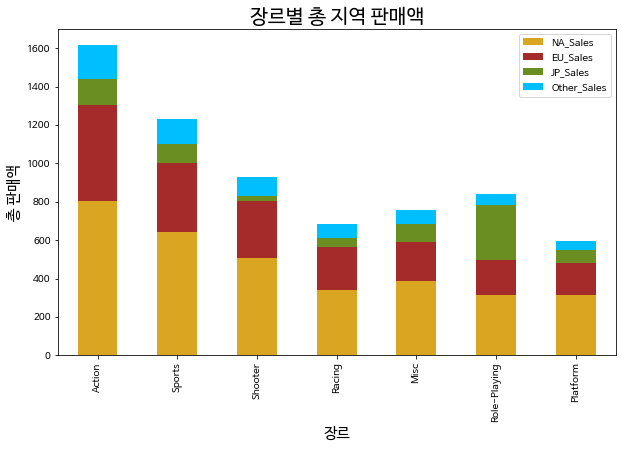

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

Genre1 = df.copy()

# 판매량이 높은 장르 6개만 추출
Genre1 = Genre1.groupby('Genre').sum().iloc[:-1,1:]
Genre1 = Genre1.sort_values('NA_Sales',ascending=False)
Genre1 = Genre1.iloc[:7,1:-1]

Genre2 = Genre1.sort_values('EU_Sales',ascending=False)
Genre2 = Genre2.iloc[:7,:]
print(Genre2)


ax = Genre2.plot.bar(stacked=True, figsize=(10,6), color=['goldenrod', 'brown', 'olivedrab', 'deepskyblue'])
plt.title("장르별 총 지역 판매액", fontsize=20)
plt.xlabel('장르', fontsize = 15)
plt.ylabel('총 판매액', fontsize=15)
# plt.grid(True, axis='y')

# ax2 = Genre2.plot.bar(stacked=True, figsize=(10,6), color=['goldenrod', 'brown', 'olivedrab', 'deepskyblue'])
# plt.title("장르별 총 지역 판매액", fontsize=20)
# plt.xlabel('장르', fontsize = 15)
# plt.ylabel('총 판매액', fontsize=15)




> 일본을 제외한 모든 지역에서 Action, Sports, Shooter 장르 순으로 판매비중이 높음.
>
> * 일본은 Role-Playing, Action, Sports 순으로 장르를 선호하는 것으로 보여짐
---
> 지역타겟 범위인 유럽 중에서 제일 잘 팔리는 장르인
>
> **Action** 장르를 타겟으로 한다.

In [83]:
import numpy as np

# Action과 Shooter 장르의 데이터만 가져옴
year_sales2 = df[(df.Genre == "Action") | (df.Genre == "Shooter")]


# 연도별로 묶어서 총 매출액을 합산. 매출액 기준으로 정렬
year_sales2 = pd.DataFrame(year_sales.pivot_table(index='Year',columns='Name',values='total_Sales',aggfunc=['sum'], fill_value=0,margins=True))
year_sales2.sort_values(by='All',ascending=False,inplace=True,axis=1)

year_sales2.head()


sum                     ...                                                
Name   All Grand Theft Auto V  ... Teenage Mutant Ninja Turtles Double Pack Dokuro
Year                           ...                                                
1996 27.50               0.00  ...                                     0.00   0.00
1997 49.75               0.00  ...                                     0.00   0.00
1998 49.21               0.00  ...                                     0.00   0.00
1999 39.85               0.00  ...                                     0.00   0.00
2000 40.72               0.00  ...                                     0.00   0.00

[5 rows x 2463 columns]